In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [11]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("val.csv")


In [12]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Validation shape:", val_df.shape)

Train shape: (1914056, 45)
Test shape: (546874, 44)
Validation shape: (273437, 45)


Dataset Shape: (1914056, 46)


,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active,source
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,...,35,53,45,41,4,0,2018,2021,4,train
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,...,12,27,27,22,2,1,1975,1983,8,train
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,...,23,45,43,10,0,0,1982,1989,8,train
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,...,35,192,172,155,16,9,1994,2009,16,train
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,...,31,175,146,132,29,17,2011,2021,11,train


,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active,source
count,1.914056e+06,1.914056e+06,1914056,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1914056,1.914056e+06,1914056,...,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1914056
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,2,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,Moto2,NaN,NaN,NaN,NaN,Wet,NaN,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
freq,NaN,NaN,640761,NaN,NaN,NaN,NaN,959552,NaN,639333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914056
mean,1.367777e+06,5.509394e+03,NaN,4.701208e+00,2.150189e+01,1.149819e+01,2.496328e+02,NaN,5.951643e+01,NaN,...,2.973457e+01,1.012372e+02,8.746167e+01,7.096455e+01,1.399721e+01,7.374099e+00,1.993047e+03,2.002509e+03,9.377671e+00,NaN
std,7.890630e+05,2.597186e+03,NaN,6.910968e-01,2.293772e+00,6.334418e+00,5.773525e+01,NaN,1.733707e+01,NaN,...,1.162753e+01,8.143524e+01,6.986620e+01,6.685675e+01,2.615523e+01,1.641622e+01,1.683261e+01,1.747976e+01,5.144729e+00,NaN
min,0.000000e+00,1.000000e+03,NaN,3.500000e+00,1.800000e+01,1.000000e+00,1.500000e+02,NaN,3.000000e+01,NaN,...,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.949000e+03,1.949000e+03,1.000000e+00,NaN
25%,6.847348e+05,3.258000e+03,NaN,4.104000e+00,1.900000e+01,6.000000e+00,1.993500e+02,NaN,4.400000e+01,NaN,...,2.100000e+01,3.500000e+01,3.100000e+01,1.700000e+01,0.000000e+00,0.000000e+00,1.983000e+03,1.991000e+03,5.000000e+00,NaN
50%,1.368276e+06,5.514000e+03,NaN,4.702000e+00,2.200000e+01,1.200000e+01,2.496500e+02,NaN,6.000000e+01,NaN,...,2.900000e+01,8.500000e+01,7.400000e+01,5.300000e+01,4.000000e+00,1.000000e+00,1.996000e+03,2.007000e+03,9.000000e+00,NaN
75%,2.050815e+06,7.760000e+03,NaN,5.299000e+00,2.400000e+01,1.700000e+01,2.994600e+02,NaN,7.500000e+01,NaN,...,4.000000e+01,1.460000e+02,1.230000e+02,1.060000e+02,1.600000e+01,7.000000e+00,2.006000e+03,2.019000e+03,1.200000e+01,NaN


<Figure size 1000x400 with 0 Axes>

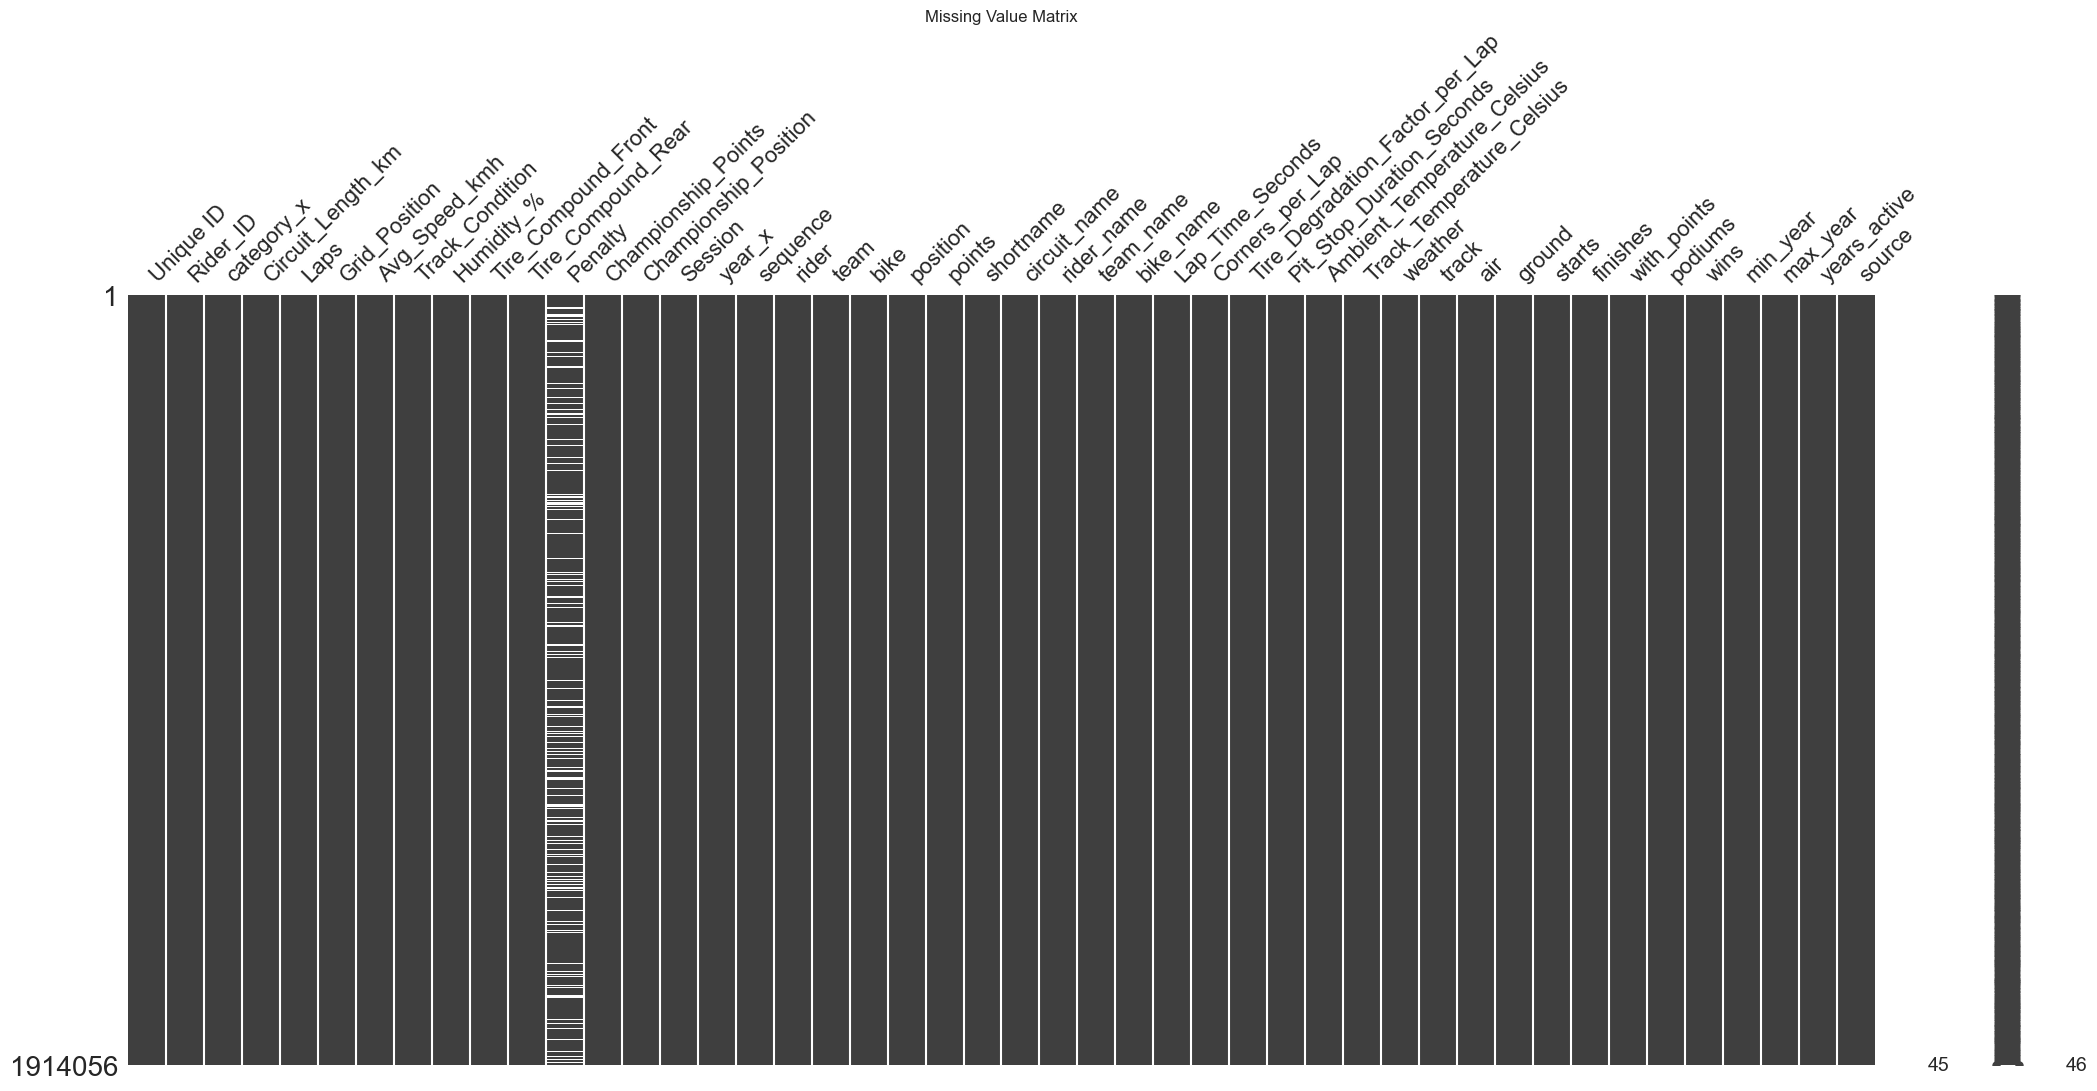

Missing Values Detected:


Penalty    321292
dtype: int64

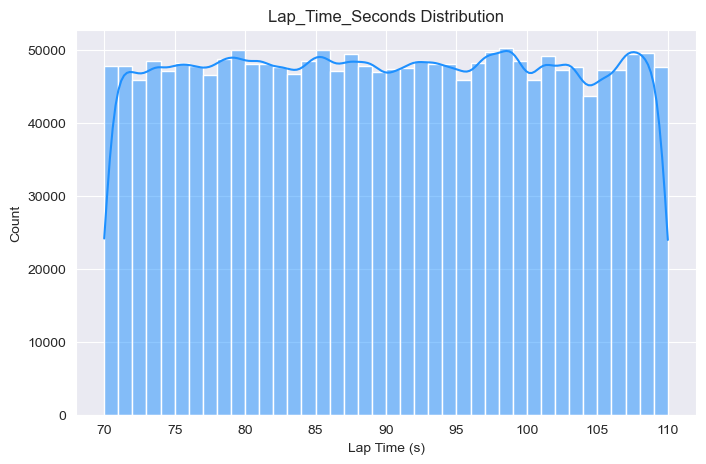

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

print("Dataset Shape:", train.shape)
display(train.head())
display(train.describe(include='all'))

plt.figure(figsize=(10, 4))
msno.matrix(train)
plt.title("Missing Value Matrix")
plt.show()

missing_vals = train.isnull().sum()
missing_vals = missing_vals[missing_vals > 0].sort_values(ascending=False)
if not missing_vals.empty:
    print("Missing Values Detected:")
    display(missing_vals)

plt.figure(figsize=(8, 5))
sns.histplot(train['Lap_Time_Seconds'], kde=True, bins=40, color='dodgerblue')
plt.title("Lap_Time_Seconds Distribution")
plt.xlabel("Lap Time (s)")
plt.show()


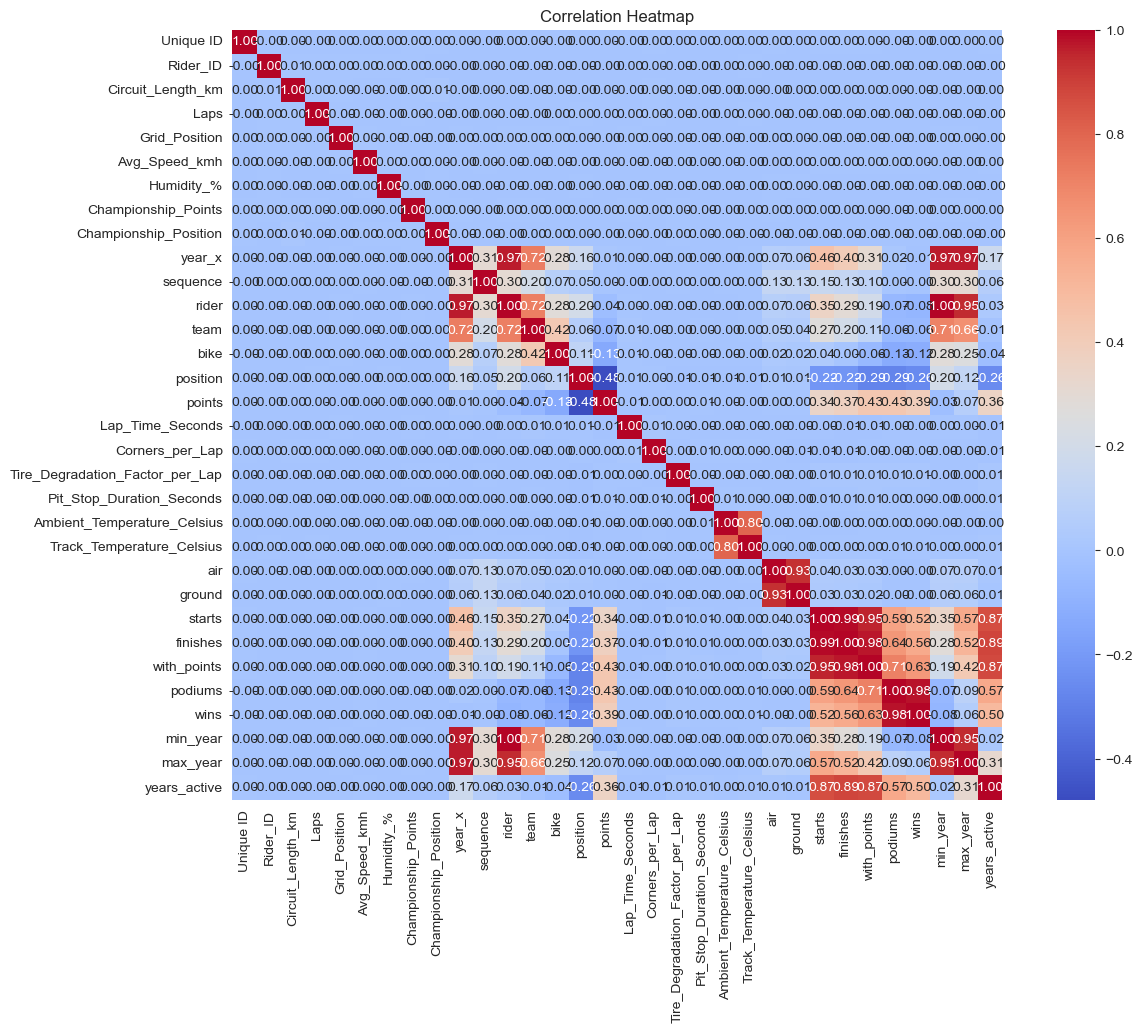

In [15]:
plt.figure(figsize=(14, 10))
corr_matrix = train.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


Outliers in Target Variable: 0 / 1914056


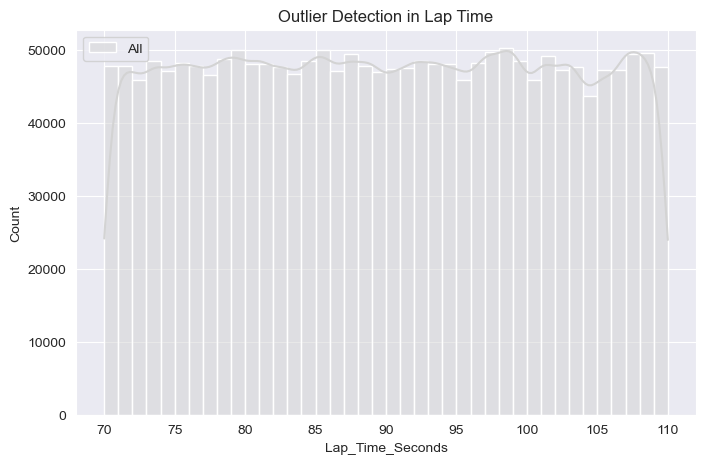

In [16]:
from scipy.stats import iqr

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

outliers = detect_outliers(train['Lap_Time_Seconds'])
print(f"Outliers in Target Variable: {outliers.sum()} / {len(outliers)}")

plt.figure(figsize=(8, 5))
sns.histplot(train['Lap_Time_Seconds'], bins=40, color='lightgrey', kde=True, label='All')
sns.histplot(train[outliers]['Lap_Time_Seconds'], bins=40, color='red', label='Outliers', kde=True)
plt.legend()
plt.title("Outlier Detection in Lap Time")
plt.show()


In [27]:
def engineer_features(df):
    df = df.copy()

    cat_cols = ['category_x', 'Track_Condition', 'Tire_Compound_Front']
    for col in cat_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')

    if 'category_x' in df.columns and 'Track_Condition' in df.columns:
        df['category_track'] = df['category_x'].astype(str) + '_' + df['Track_Condition'].astype(str)
        df['category_track'] = df['category_track'].astype('category')

    if 'Grid_Position' in df.columns and df['Grid_Position'].max() > 1:
        df['grid_advantage'] = 1.0 / (df['Grid_Position'] + 1e-5)

    if 'Avg_Speed_kmh' in df.columns and 'Circuit_Length_km' in df.columns:
        df['speed_per_km'] = df['Avg_Speed_kmh'] / (df['Circuit_Length_km'] + 1e-5)

    if 'Laps' in df.columns and 'Circuit_Length_km' in df.columns:
        df['laps_per_km'] = df['Laps'] / (df['Circuit_Length_km'] + 1e-5)

    if 'Humidity_%' in df.columns:
        df['humidity_bin'] = pd.cut(df['Humidity_%'], bins=[0, 30, 60, 100], labels=['Low', 'Med', 'High'])
        df['humidity_bin'] = df['humidity_bin'].astype('category')

    if 'Rider_ID' in df.columns:
        df['Rider_ID'] = df['Rider_ID'].astype('category')

    return df


In [28]:
import os
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error



In [29]:
!pip install --quiet xgboost==2.0.3 pandas==2.2.2
import pandas as pd, numpy as np, os, xgboost as xgb, time, gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
TARGET = "Lap_Time_Seconds"
ID_COL = "Unique ID"


In [30]:
def add_features(df):
    if {"Circuit_Length_km", "Avg_Speed_kmh"}.issubset(df.columns):
        df["secs_per_km"] = (df["Circuit_Length_km"] / df["Avg_Speed_kmh"]) * 3600
    if {"team_name", "Rider_ID"}.issubset(df.columns):
        df["Team_Rider_ID"] = df["team_name"].astype(str) + "_" + df["Rider_ID"].astype(str)
    if "Laps" in df.columns:
        df["Lap_Squared"] = df["Laps"] ** 2
    return df

In [55]:


train_df.columns = train_df.columns.str.strip()

features = [
    'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'Championship_Points', 'Championship_Position', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground',
    'starts', 'finishes', 'with_points', 'podiums', 'wins', 'years_active'
]


cat_features = [
    'category_x', 'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'weather', 'track', 'air', 'ground'
]

for col in cat_features:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype(str)

print("✅ Features used:", features)
print("✅ Categorical features:", cat_features)
print(train_df[features].dtypes)

submission = pd.DataFrame({ID_COL: test_df[ID_COL], TARGET: preds})
submission.to_csv("submission.csv", index=False)

✅ Features used: ['category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty', 'Championship_Points', 'Championship_Position', 'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins', 'years_active']
✅ Categorical features: ['category_x', 'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'weather', 'track', 'air', 'ground']
category_x                          object
Circuit_Length_km                  float64
Laps                                 int64
Grid_Position                        int64
Avg_Speed_kmh                      float64
Track_Condition                     object
Humidity_%                           int64
Tire_Compound_Front                 object
Tire_Compound_Rear              

In [76]:
# Imports
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


print(train_df.shape)
print(train_df[TARGET].describe())


train_df = train_df.drop_duplicates()


train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()


TARGET = "Lap_Time_Seconds"
ID_COL = "Unique ID"


features = [
    'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'Championship_Points', 'Championship_Position',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground',
    'starts', 'finishes', 'with_points', 'podiums', 'wins', 'years_active'
]

cat_features = [
    'category_x', 'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'weather', 'track', 'air', 'ground'
]

# Convert categorical to string
for col in cat_features:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# Encode categorical features
X_all = pd.concat([train_df[features], test_df[features]], axis=0)
X_all_encoded = pd.get_dummies(X_all, columns=cat_features)

# Split back
X_train = X_all_encoded.iloc[:len(train_df), :]
X_test = X_all_encoded.iloc[len(train_df):, :]
y_train = train_df[TARGET]

# Log-transform the target
y_train_log = np.log1p(y_train)

# Train/Val split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train_log, test_size=0.2, random_state=42)

# Model
model = LGBMRegressor(
    objective='regression',
    learning_rate=0.01,
    num_leaves=128,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    n_estimators=5000,
    verbosity=-1,
    random_state=42
)

# Train
model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(100), log_evaluation(50)]
)

# Validation
y_val_pred_log = model.predict(X_val)
y_val_pred = np.expm1(y_val_pred_log)
rmse = np.sqrt(mean_squared_error(np.expm1(y_val), y_val_pred))

print("Validation RMSE:", rmse)

# Final prediction on test set
y_test_pred_log = model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)

# Submission
submission = pd.DataFrame({
    ID_COL: test_df[ID_COL],
    TARGET: y_test_pred
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved.")


(1914056, 45)
count    1.914056e+06
mean     9.000211e+01
std      1.153121e+01
min      7.000100e+01
25%      8.001300e+01
50%      8.998100e+01
75%      9.991700e+01
max      1.099990e+02
Name: Lap_Time_Seconds, dtype: float64
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.127255	valid_0's l2: 0.0161938
[100]	valid_0's rmse: 0.126354	valid_0's l2: 0.0159654
[150]	valid_0's rmse: 0.125528	valid_0's l2: 0.0157574
[200]	valid_0's rmse: 0.124746	valid_0's l2: 0.0155615
[250]	valid_0's rmse: 0.123993	valid_0's l2: 0.0153742
[300]	valid_0's rmse: 0.123282	valid_0's l2: 0.0151983
[350]	valid_0's rmse: 0.122538	valid_0's l2: 0.0150157
[400]	valid_0's rmse: 0.121829	valid_0's l2: 0.0148423
[450]	valid_0's rmse: 0.121132	valid_0's l2: 0.014673
[500]	valid_0's rmse: 0.120492	valid_0's l2: 0.0145184
[550]	valid_0's rmse: 0.119841	valid_0's l2: 0.0143619
[600]	valid_0's rmse: 0.119213	valid_0's l2: 0.0142117
[650]	valid_0's rmse: 0.118587	valid_0's l2: 0.0140

In [45]:
for col in features:
    if col not in cat_features:
        bad_vals = train_df[~train_df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())][col]
        if not bad_vals.empty:
            print(f"⚠️ Non-numeric values in {col}:")
            print(bad_vals.unique())

⚠️ Non-numeric values in Penalty:
['+3s' '+5s' 'DNF' 'DNS' 'Ride Through' nan]


In [46]:
def clean_penalty(value):
    value = str(value).strip().lower()

    if value.endswith("s"):  # like '3s', '5s'
        try:
            return float(value.replace("s", ""))
        except:
            return np.nan
    elif value in ['dnf', 'dns', 'ride through']:
        return 99.0  # Or use np.nan or 0 depending on your logic
    else:
        try:
            return float(value)
        except:
            return np.nan

# Apply it to train and test
train_df['Penalty'] = train_df['Penalty'].apply(clean_penalty)
test_df['Penalty'] = test_df['Penalty'].apply(clean_penalty)

In [52]:
assert 'Lap_Time_Seconds' in train_df.columns, "Lap_Time_Seconds is missing!"

In [53]:
train_df = train_df[features + [TARGET]]

In [64]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


✅ submission.csv saved!


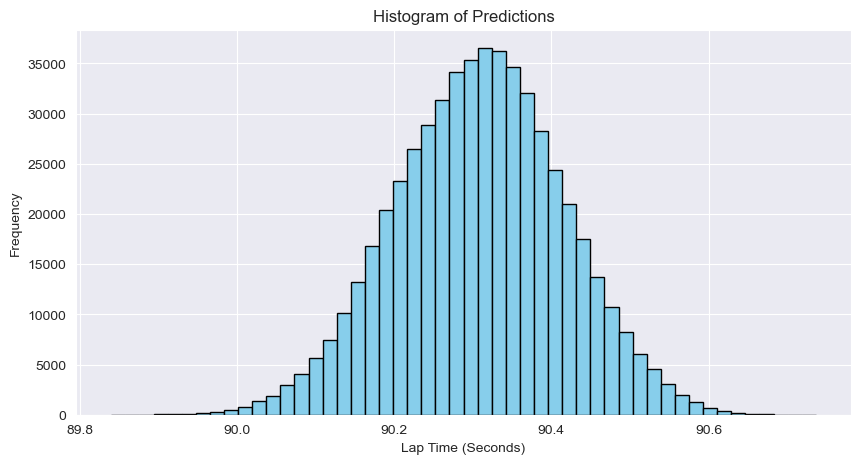

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import Pool


TARGET = 'Lap_Time_Seconds'
ID_COL = 'Unique ID'

cat_features = [
    'category_x', 'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'weather', 'track', 'air', 'ground'
]

for col in cat_features:
    test_df[col] = test_df[col].astype(str)

features = [
    'category_x', 'Circuit_Length_km', 'Laps', 'Grid_Position', 'Avg_Speed_kmh',
    'Track_Condition', 'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear',
    'Penalty', 'Championship_Points', 'Championship_Position',
    'Corners_per_Lap', 'Tire_Degradation_Factor_per_Lap',
    'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
    'Track_Temperature_Celsius', 'weather', 'track', 'air', 'ground',
    'starts', 'finishes', 'with_points', 'podiums', 'wins', 'years_active'
]


X_test = test_df[features]
test_pool = Pool(X_test, cat_features=cat_features)

preds = np.mean([model.predict(test_pool) for model in models], axis=0)

submission = pd.DataFrame({
    ID_COL: test_df[ID_COL],
    TARGET: preds
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved!")


plt.figure(figsize=(10, 5))
plt.hist(preds, bins=50, color='skyblue', edgecolor='k')
plt.title("Histogram of Predictions")
plt.xlabel("Lap Time (Seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [94]:

print("🔍 Sample Predictions:")
print(submission.head(10).to_string(index=False))


🔍 Sample Predictions:
 Unique ID  Lap_Time_Seconds
    288307         90.288008
    704288         90.201383
    951491         90.382478
   2591721         90.219359
   1202653         90.475806
    267368         90.183121
   2402464         90.360888
   2705278         90.179767
   1719216         90.358914
    442612         90.390123
